In [28]:
import numpy as np
from montlake.vendor.tfcompat.hparam import HParams
from montlake.exec.run_exp import subset_data

import itertools
import numpy as np
import scipy
import json
# export 

from montlake.atomgeom.features import get_features,get_D_feats_feats
from montlake.atomgeom.utils import get_atoms_4
from montlake.simulations.rigidethanol import get_rigid_ethanol_data
from montlake.utils.utils import get_234_indices, get_atoms3_full, get_atoms4_full, data_stream_custom_range, get_cosines
from montlake.geometry.geometry import get_geom, get_wlpca_tangent_sel, get_rm_tangent_sel
from montlake.gradients.estimate import get_grads_pullback
from montlake.statistics.normalization import normalize_L212
from montlake.optimization.gradientgrouplasso import get_sr_lambda_parallel
from montlake.optimization.utils import get_selected_function_ids,get_selected_functions_lm2
from montlake.utils.replicates import Replicate, get_supports_brute,get_supports_lasso

from megaman.embedding import SpectralEmbedding
from montlake.plotting.manifolds import plot_manifold_3d,plot_manifold_featurespace
import dill as pickle
import os
import sys
import numpy as np
import itertools
from itertools import permutations,combinations
from sklearn.decomposition import TruncatedSVD
import pathos
from pathos.multiprocessing import ProcessingPool as Pool

infile = '/Users/samsonkoelle/thesis_data/processed_data/malonaldehyde_debug/mal_debugresults_mflasso'
infile = '/homes/sjkoelle/thesis_data/processed_data/mal_diagram_mflasso_122221/mal_diagramresults_mflasso'

with open(infile,'rb') as inp:
    results = pickle.load(inp, pickle.HIGHEST_PROTOCOL)

In [29]:
results['replicates_small'][0].cosine_abs

array([[1.        , 0.99362896, 0.99103935, 0.98498071, 0.99394884,
        0.98833181, 0.19152754, 0.17272336, 0.18147213, 0.19020978,
        0.17281073, 0.1869935 ],
       [0.99362896, 1.        , 0.98718964, 0.99236258, 0.98783528,
        0.99399079, 0.18789542, 0.16796014, 0.18250891, 0.18831662,
        0.17310524, 0.1874464 ],
       [0.99103935, 0.98718964, 1.        , 0.99456511, 0.99683992,
        0.99333978, 0.20760265, 0.20405773, 0.21199452, 0.20059454,
        0.19979462, 0.20729613],
       [0.98498071, 0.99236258, 0.99456511, 1.        , 0.99036373,
        0.99764681, 0.20193068, 0.20505189, 0.213841  , 0.19969851,
        0.20142765, 0.21253426],
       [0.99394884, 0.98783528, 0.99683992, 0.99036373, 1.        ,
        0.99427217, 0.20119412, 0.19748646, 0.20462855, 0.19510411,
        0.19626863, 0.20517991],
       [0.98833181, 0.99399079, 0.99333978, 0.99764681, 0.99427217,
        1.        , 0.19840738, 0.19723775, 0.2080331 , 0.19997719,
        0.19710538,

In [35]:
results.keys()

dict_keys(['selected_lasso', 'data', 'embed', 'supports_lasso_values', 'supports_ts_values', 'dictionary', 'supports_ts', 'geom', 'replicates_small', 'supports_lasso', 'selected_ts'])

In [36]:
alpha = 1
s = 1
title = 'Malonaldehyde'
n = 50000
colors = np.vstack([np.hstack(results['supports_lasso_values'][i]) for i in range(n)])
c= colors[:,0]
embed = results['embed']

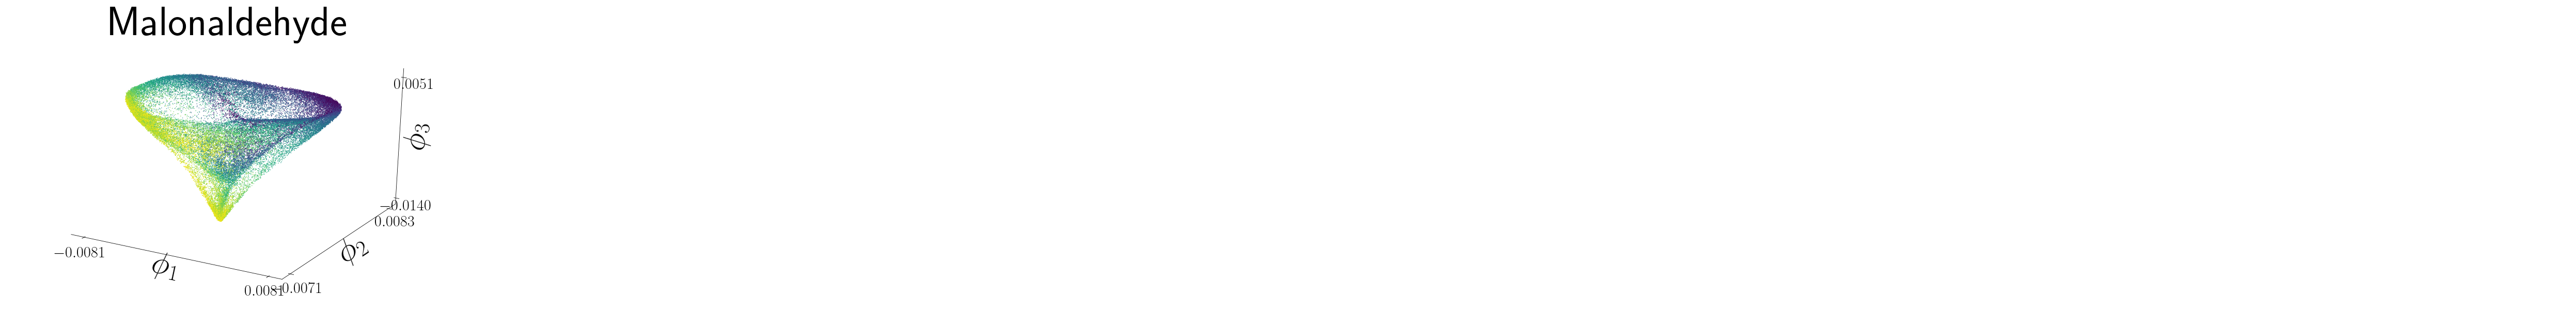

In [37]:
plot_manifold_3d(embed, s, alpha, c, title)